In [5]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from scipy.sparse.csgraph import johnson
import networkx as nx
from scipy.optimize import curve_fit

## Floyd Warshall Algorithm
I generate a random graph with number of nodes in the range (1 to 100) 
for each number of nodes (n) I apply the algorithm three times
to calculate the average time consumed by the algorithm

In [6]:
N=100
num_iteration=3
total_times = np.zeros(N)
for i in range(num_iteration):
    local_time = []
    for n in tqdm(range(N)):
        num_nodes=n 
        num_edges= 5*n
        graph = nx.gnm_random_graph(num_nodes, num_edges)
        # generating randome positive weights
        weights =  np.random.randint(100, size=num_edges)
        # looping over the graph's edges to fill the weights 
        for i, node in zip (range(0,num_edges) , graph.edges()):
            graph[node[0]][node[1]]['weight'] = weights[i]
            graph[node[1]][node[0]]['weight'] = weights[i]
        # start time
        start = timer()
        nx.algorithms.shortest_paths.dense.floyd_warshall(graph, 'weight')
        # end time
        end = timer() - start
        local_time.append(end)

    total_times += np.array(local_time)

avg_time = total_times / num_iteration

100%|██████████| 100/100 [00:12<00:00,  7.84it/s]


In [9]:
def cubic_est(x, a):
    return a*x**3

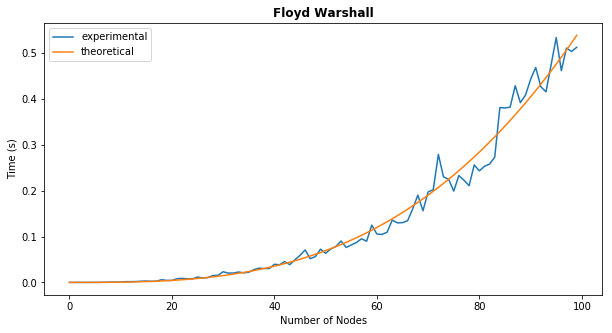

5.552522032766427e-07


In [34]:
# plot graph
x = np.arange(0,N)
plt.figure(figsize=(10,5))
plt.plot(x, avg_time, label='experimental')
props = curve_fit(cubic_est, x, avg_time)
plt.plot(x, cubic_est(x, *props[0]), label='theoretical')
plt.title('Floyd Warshall', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Number of Nodes')
plt.legend()
plt.show()
print(*props[0])

## Johnson Algorithm
I generate a random graph with number of nodes in the range (1 to 100) 
for each number of nodes (n) I apply the algorithm three times
to calculate the average time consumed by the algorithm

In [11]:
N=100
num_iteration=3
total_times_john = np.zeros(N)
for i in range(num_iteration):
    local_time_john = []
    for n in tqdm(range(N)):
        rng = default_rng()
        rvs = stats.poisson(25, loc=10).rvs
        S = random(n, n, density=0.5, random_state=5, data_rvs=rvs)
        sparse=S.A
        # start time
        start = timer()
        result=johnson(csgraph=sparse, directed=False,return_predecessors=True)
        # end time
        end = timer() - start
        local_time_john.append(end)
    total_times_john += np.array(local_time_john)
avg_time_john = total_times_john / num_iteration

100%|██████████| 100/100 [00:00<00:00, 112.40it/s]


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


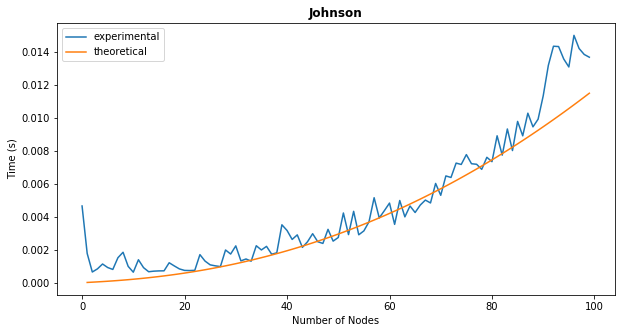

In [35]:
# plot graph
x = np.arange(0,N)
plt.figure(figsize=(10,5))
plt.plot(x, avg_time_john, label='experimental')
plt.plot(x, 0.00000022*x**2 * np.log(x) + 0.000016 * x, label='theoretical')
plt.title('Johnson', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Number of Nodes')
plt.legend()
plt.show()